# household electric power consumption Prediction

![img](../data/img.jpeg)

# Problem Statement
Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available. Our goal is to predict Total Power Consumption.

Dataset: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

## Attribute Information:
- 1.date: Date in format dd/mm/yyyy
- 2.time: time in format hh:mm:ss
- 3.global_active_power: household global minute-averaged active power (in kilowatt)
- 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)
- 5.voltage: minute-averaged voltage (in volt)
- 6.global_intensity: household global minute-averaged current intensity (in ampere)
- 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
- 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
- 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../data/household_power_consumption.csv',sep=';')

In [5]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [6]:
df.shape

(2075259, 9)

#### Report:
- Dataset is very large. We'll try to select random sample of shape (100000,9).

In [7]:
df = df.sample(100000,ignore_index=True )

In [8]:
df.shape

(100000, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   100000 non-null  object 
 1   Time                   100000 non-null  object 
 2   Global_active_power    100000 non-null  object 
 3   Global_reactive_power  100000 non-null  object 
 4   Voltage                100000 non-null  object 
 5   Global_intensity       100000 non-null  object 
 6   Sub_metering_1         100000 non-null  object 
 7   Sub_metering_2         100000 non-null  object 
 8   Sub_metering_3         98783 non-null   float64
dtypes: float64(1), object(8)
memory usage: 6.9+ MB


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

#### Creating Year and Month column from Date

In [11]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

#### Creating Hour from Time

In [12]:
df['Hour'] = df['Time'].dt.hour

In [13]:
df.drop(['Date','Time'],axis=1,inplace = True)

In [14]:
for col in df.columns:
    df[col].replace('?',np.nan,inplace=True)
    df[col] = df[col].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    98783 non-null   float64
 1   Global_reactive_power  98783 non-null   float64
 2   Voltage                98783 non-null   float64
 3   Global_intensity       98783 non-null   float64
 4   Sub_metering_1         98783 non-null   float64
 5   Sub_metering_2         98783 non-null   float64
 6   Sub_metering_3         98783 non-null   float64
 7   Month                  100000 non-null  float64
 8   Year                   100000 non-null  float64
 9   Hour                   100000 non-null  float64
dtypes: float64(10)
memory usage: 7.6 MB


#### Creating Total_consumption 

In [15]:
df['Total_consumption'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,98783.0,1.092760,1.055946,0.078,0.310,0.606,1.530,9.732
Global_reactive_power,98783.0,0.123739,0.112869,0.000,0.048,0.100,0.194,1.080
Voltage,98783.0,240.839687,3.244681,224.670,238.980,241.010,242.890,253.550
Global_intensity,98783.0,4.633680,4.439938,0.200,1.400,2.600,6.400,42.800
Sub_metering_1,98783.0,1.132513,6.174969,0.000,0.000,0.000,0.000,80.000
Sub_metering_2,98783.0,1.298705,5.807227,0.000,0.000,0.000,1.000,79.000
Sub_metering_3,98783.0,6.495784,8.445392,0.000,0.000,1.000,17.000,31.000
Month,100000.0,6.497020,3.440362,1.000,4.000,7.000,9.000,12.000
Year,100000.0,2008.437760,1.126161,2006.000,2007.000,2008.000,2009.000,2010.000
Hour,100000.0,11.470010,6.914710,0.000,5.000,11.000,17.000,23.000


In [17]:
null_count = df.isna().sum()
null_percent = df.isna().sum()/len(df)*100
null = {'null': null_count,'null_percent':null_percent}
null_df = pd.DataFrame(null)
null_df

,null,null_percent
Global_active_power,1217,1.217
Global_reactive_power,1217,1.217
Voltage,1217,1.217
Global_intensity,1217,1.217
Sub_metering_1,1217,1.217
Sub_metering_2,1217,1.217
Sub_metering_3,1217,1.217
Month,0,0.000
Year,0,0.000
Hour,0,0.000


#### Report
- Null values in all almost column except Month,Year and Hour

In [18]:
df.duplicated().sum()

1095

In [19]:
df[df.duplicated()]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Hour,Total_consumption
1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2009.0,10.0,NaN
2527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2007.0,18.0,NaN
2749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2010.0,12.0,NaN
3065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2010.0,11.0,NaN
3319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2010.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
99617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2007.0,0.0,NaN
99692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2010.0,1.0,NaN
99763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2007.0,3.0,NaN
99851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2010.0,7.0,NaN


In [20]:
df.drop(df[df.duplicated()].index, inplace = True)

In [21]:
null_count = df.isna().sum()
null_percent = df.isna().sum()/len(df)*100
null = {'null': null_count,'null_percent':null_percent}
null_df = pd.DataFrame(null)
null_df

,null,null_percent
Global_active_power,182,0.184015
Global_reactive_power,182,0.184015
Voltage,182,0.184015
Global_intensity,182,0.184015
Sub_metering_1,182,0.184015
Sub_metering_2,182,0.184015
Sub_metering_3,182,0.184015
Month,0,0.000000
Year,0,0.000000
Hour,0,0.000000


#### Report 
- Dropping duplicates reduced null count.

In [22]:
#define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numeric_features.remove('Total_consumption')
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Month', 'Year', 'Hour']

We have 0 categorical features : []


## Visualization of Target Column (Total_consumption)

<AxesSubplot:xlabel='Total_consumption', ylabel='Count'>

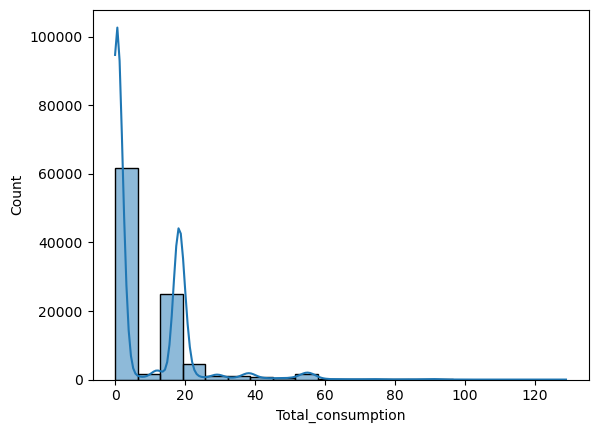

In [23]:
sns.histplot(x='Total_consumption',data= df,bins=20,kde=True)

### Univariant Analysis

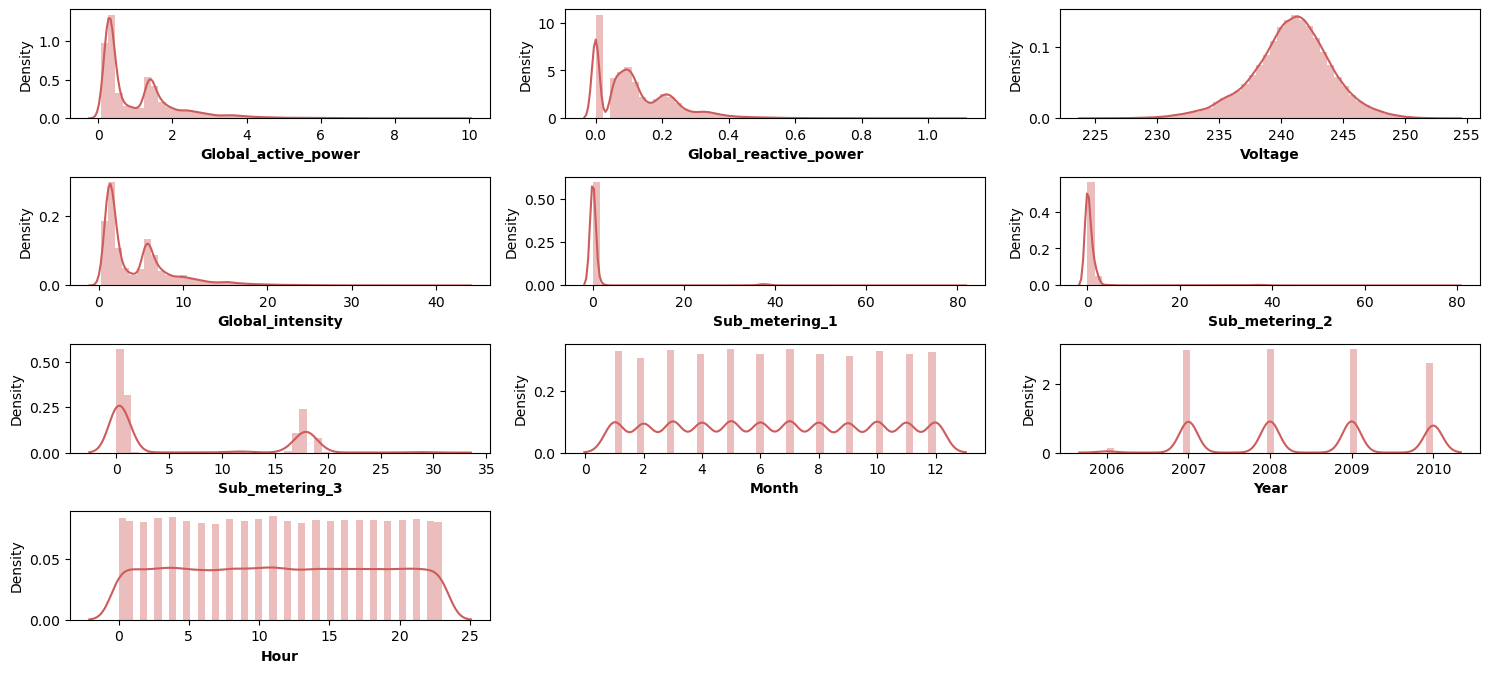

In [24]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

#### Report
- NO colums are distributed except voltage

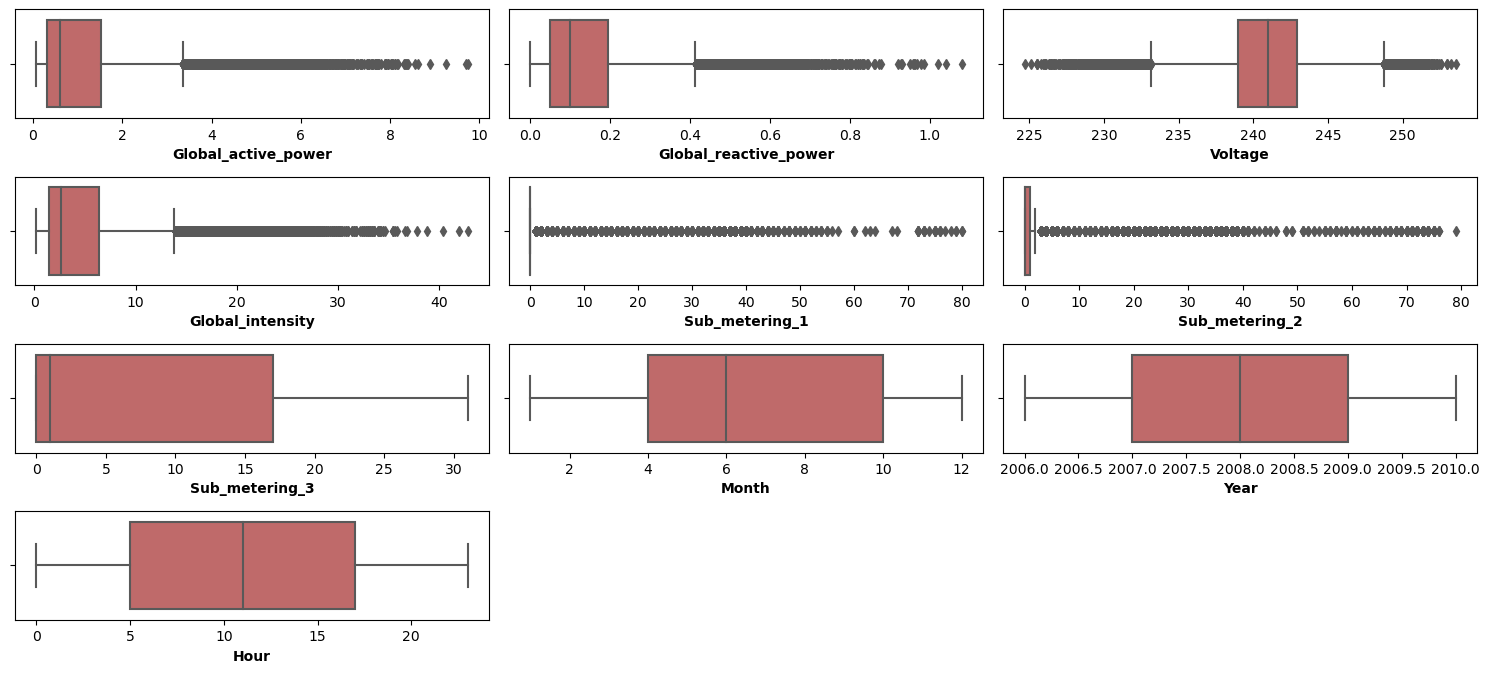

In [25]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.boxplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

#### Report
- Outliers are all column except Month, Year, Hour

## Bivariant Analysis

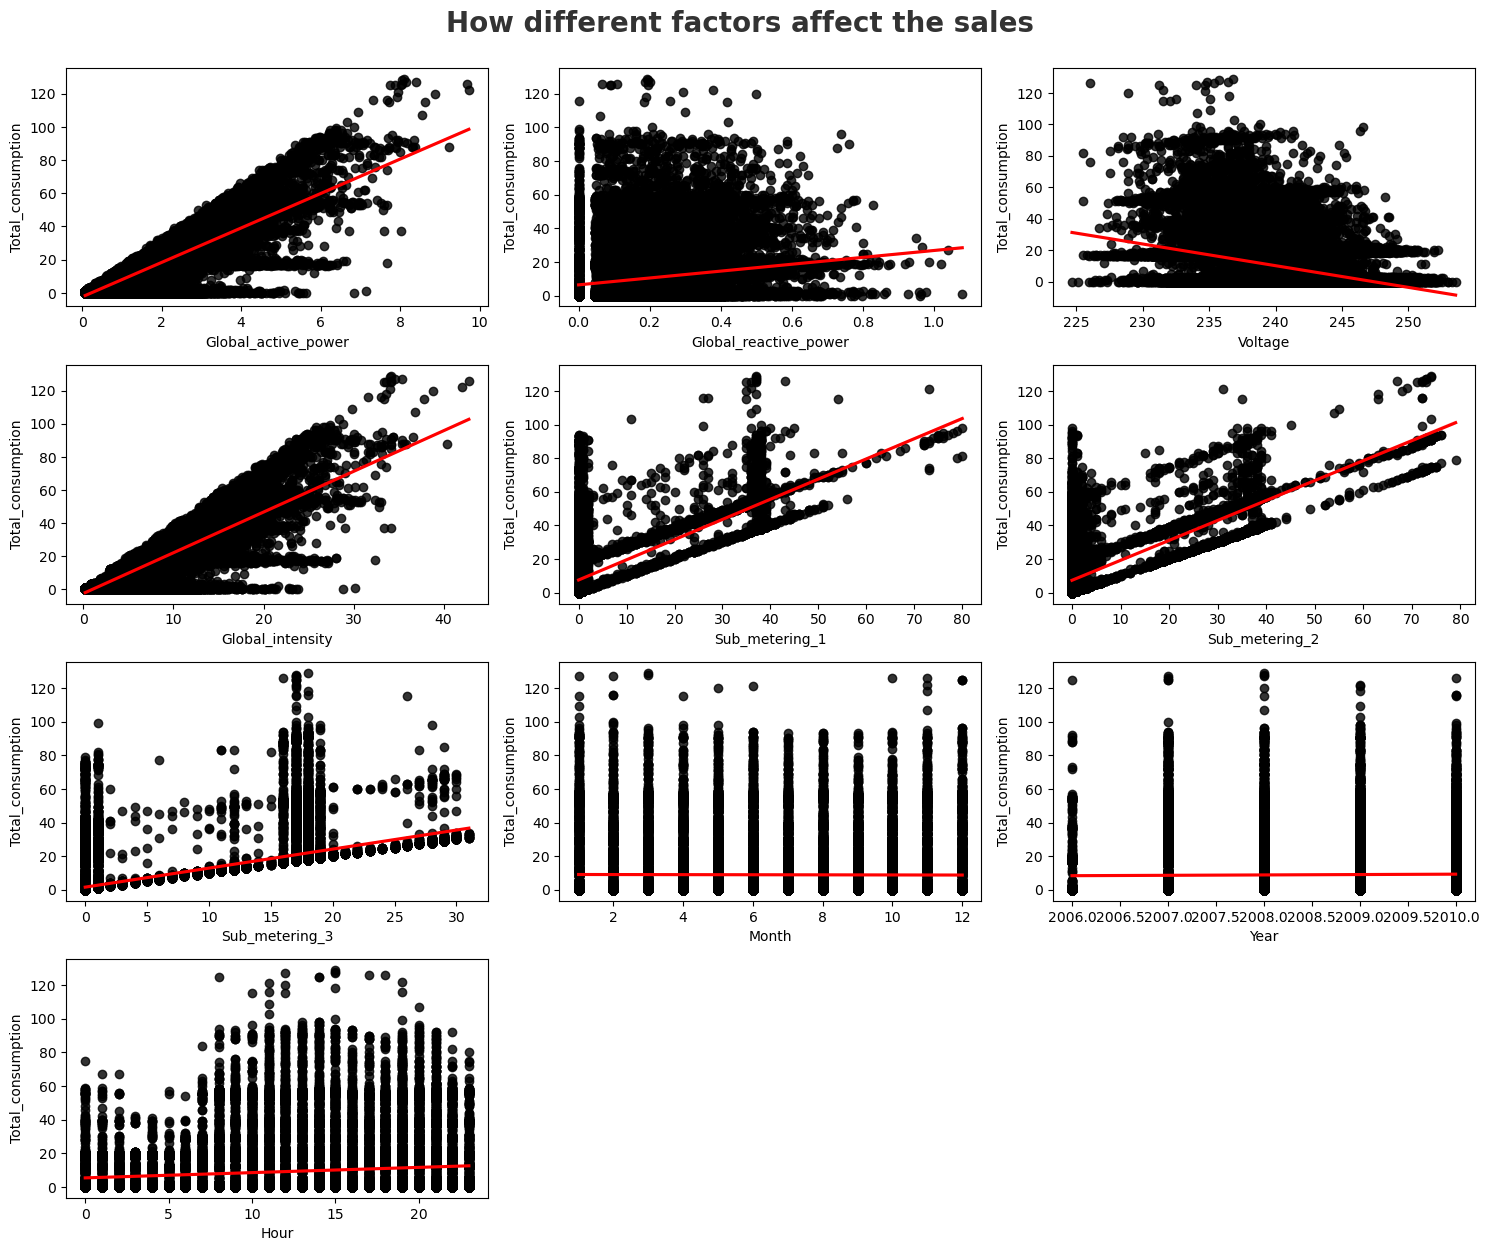

In [26]:
plt.figure(figsize=(15, 15))
plt.suptitle('How different factors affect the sales ', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.regplot(x=df[numeric_features[i]],y=df['Total_consumption'],scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Report.
- All column are positively correlated with target column except voltage.

### Which year Power Consumption was more?

In [27]:
year = df.groupby('Year')['Total_consumption'].sum().reset_index()
year

,Year,Total_consumption
0,2006.0,10363.0
1,2007.0,218003.0
2,2008.0,216121.0
3,2009.0,231950.0
4,2010.0,205273.0


<AxesSubplot:xlabel='Year', ylabel='Total_consumption'>

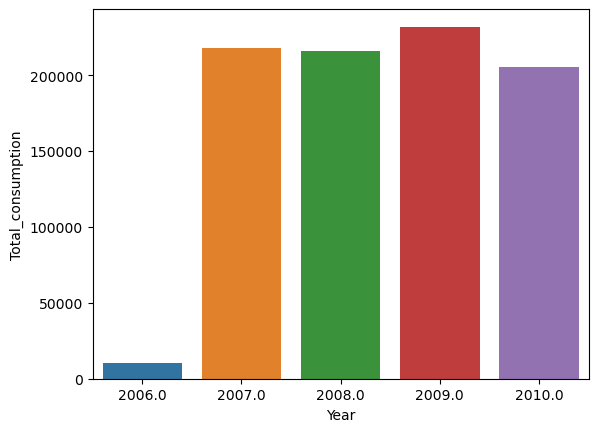

In [28]:
sns.barplot(x='Year',y='Total_consumption',data=year)

#### Report
- Data shows 2009 we consumed Power.

#### Which month of 2009 we consumed most Power?

In [29]:
month = df[df['Year']==2009].groupby('Month')['Total_consumption'].sum().reset_index()
month

,Month,Total_consumption
0,1.0,23097.0
1,2.0,16343.0
2,3.0,20791.0
3,4.0,19093.0
4,5.0,18810.0
5,6.0,16522.0
6,7.0,12931.0
7,8.0,17638.0
8,9.0,18967.0
9,10.0,21325.0


<AxesSubplot:xlabel='Month', ylabel='Total_consumption'>

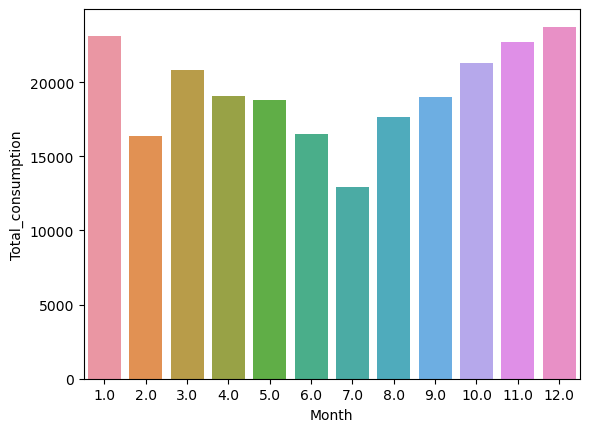

In [30]:
sns.barplot(x='Month',y='Total_consumption',data=month)

#### Report
- Last months of year we consume year.

#### At what time of day more power is consumed?

In [31]:
Hour = df.groupby('Hour')['Total_consumption'].sum().reset_index()
Hour

,Hour,Total_consumption
0,0.0,16310.0
1,1.0,12581.0
2,2.0,9664.0
3,3.0,8733.0
4,4.0,9717.0
5,5.0,10725.0
6,6.0,18494.0
7,7.0,46374.0
8,8.0,63453.0
9,9.0,62902.0


<AxesSubplot:xlabel='Hour', ylabel='Total_consumption'>

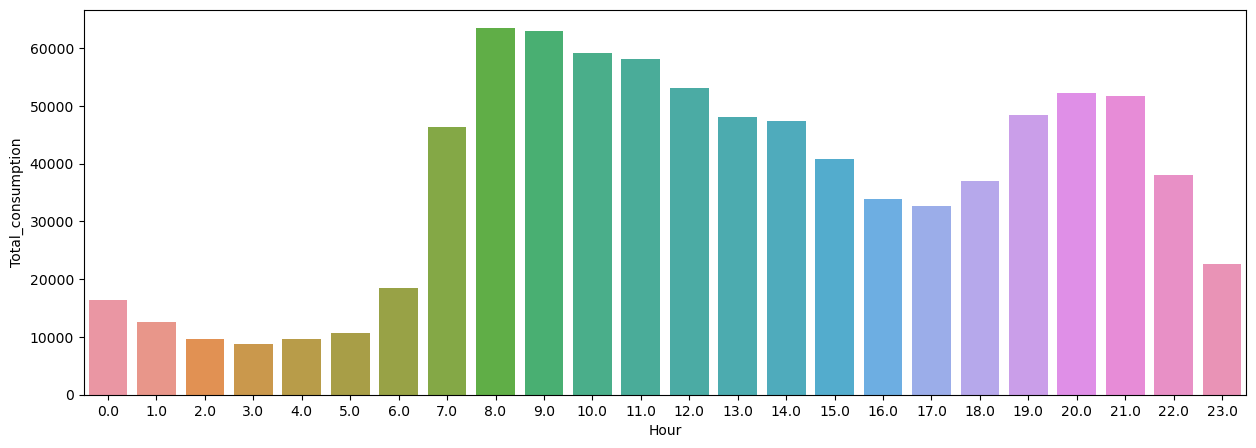

In [32]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Hour',y='Total_consumption',data=Hour)

#### Report
- we consume more power in morning.

## Feature Engineering

### Dropping uncessary columns

In [33]:
df.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1,inplace=True)

In [34]:
df.replace(np.nan,df.mean(),inplace=True)

In [35]:
# Splitting X and y for all Experiments
X= df.drop('Total_consumption', axis=1)
y = df['Total_consumption']

### Removing outliers

In [36]:
X1 = X.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = X1[col].quantile(0.25)
    percentile75 = X1[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    X1[col] = np.where(X1[col]>upper_limit, upper_limit, np.where(X1[col]<lower_limit,lower_limit,X1[col]))
    return X1[X1[col] > upper_limit]

In [37]:
for col in X1.columns:
    remove_outliers_IQR(col)

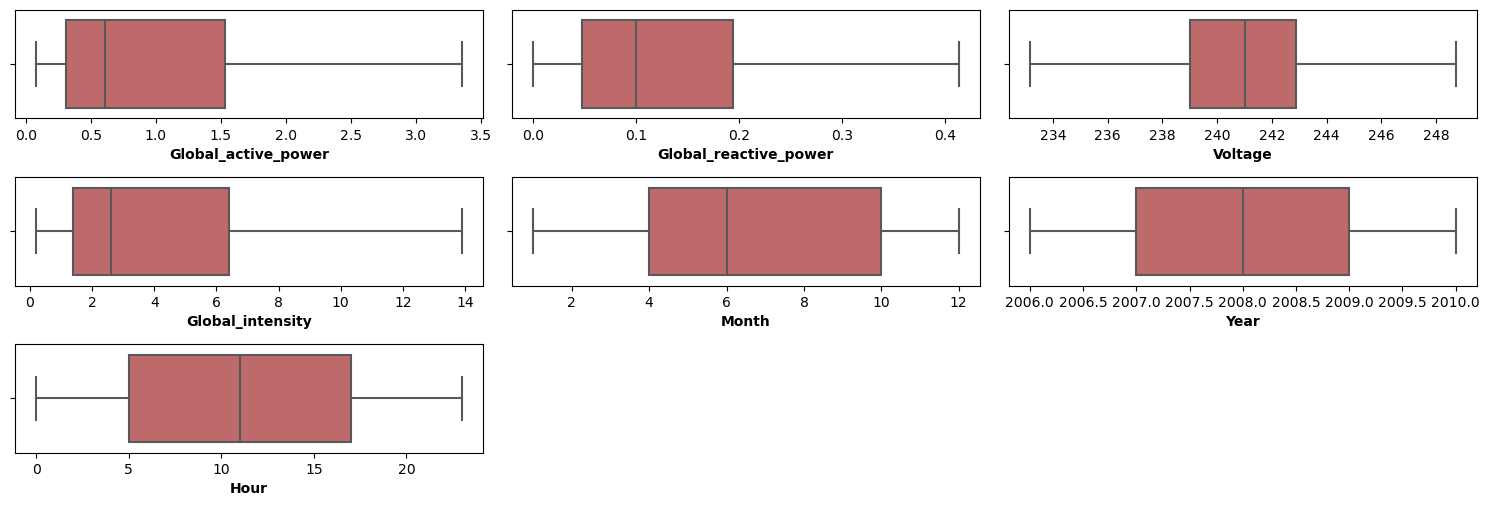

In [38]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(X1.columns):
    plt.subplot(60, 3, i+1)
    sns.boxplot(x=X1[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

#### Applying Power Transformation

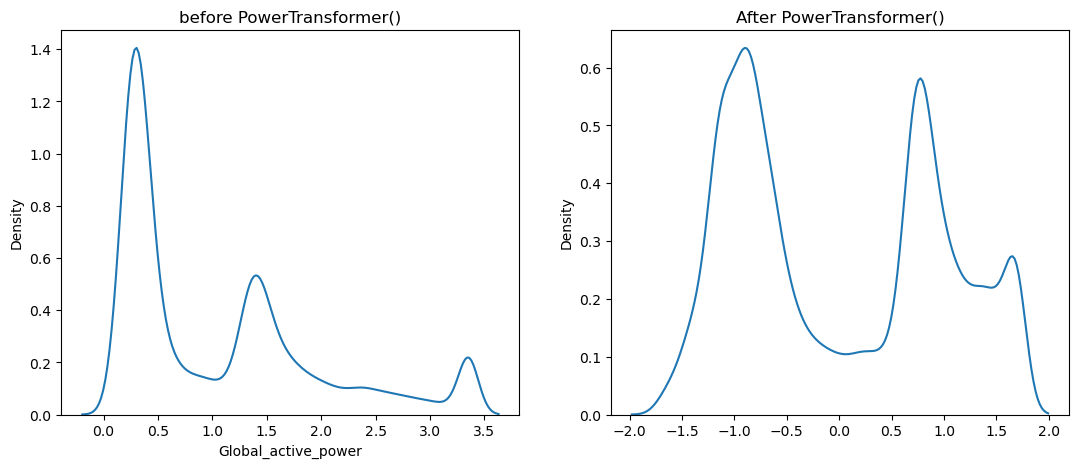

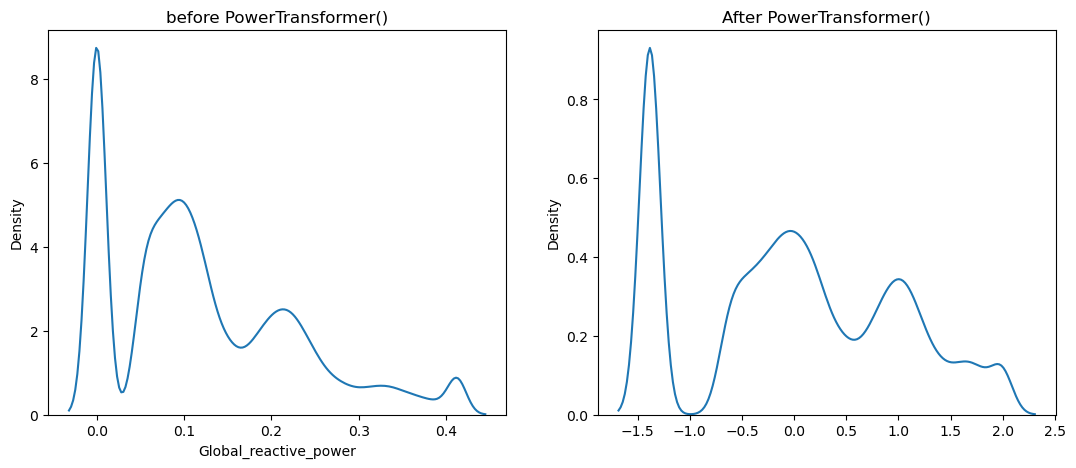

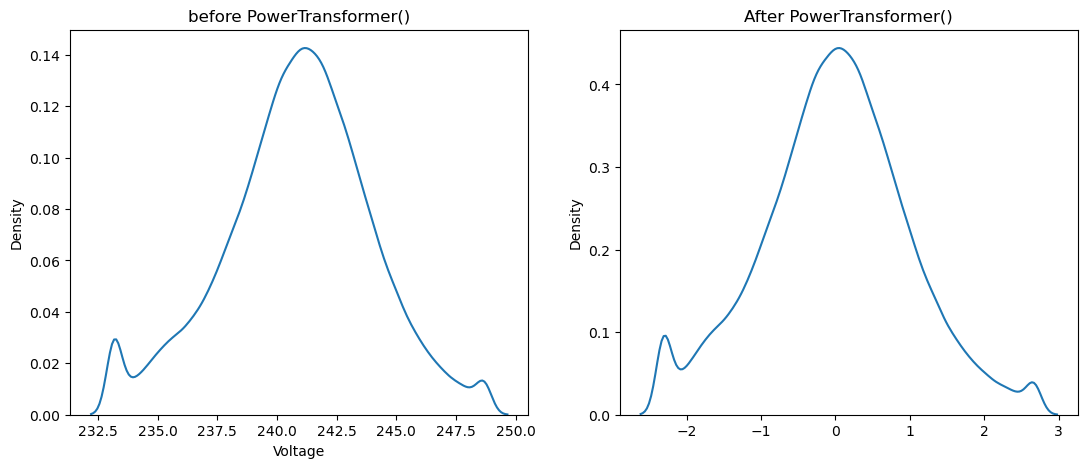

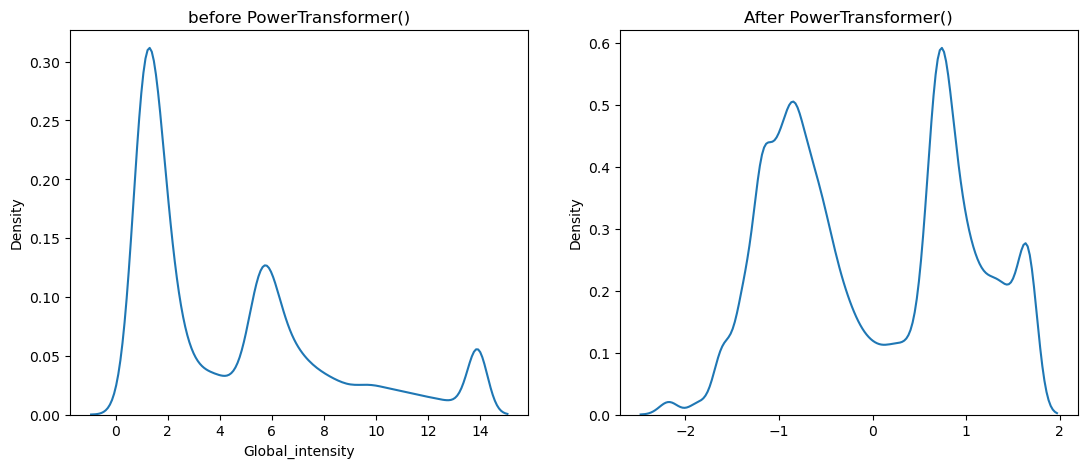

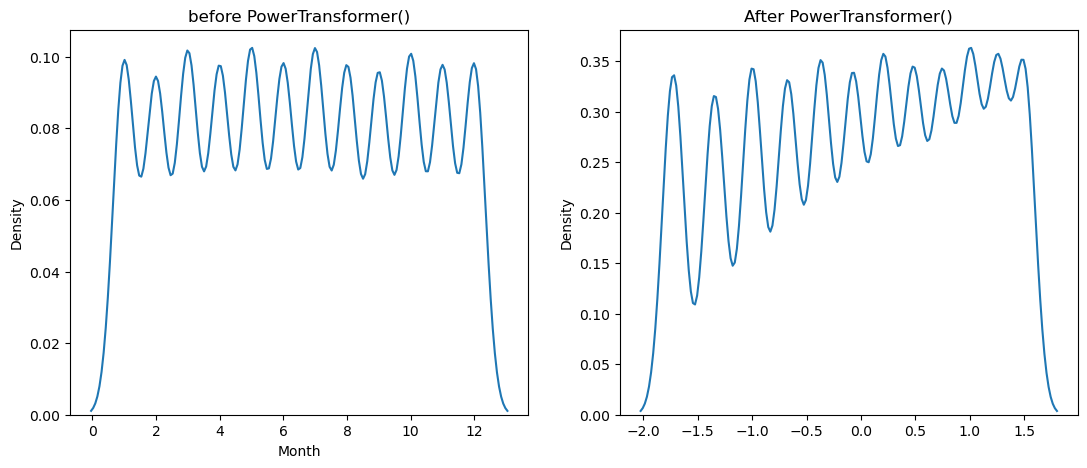

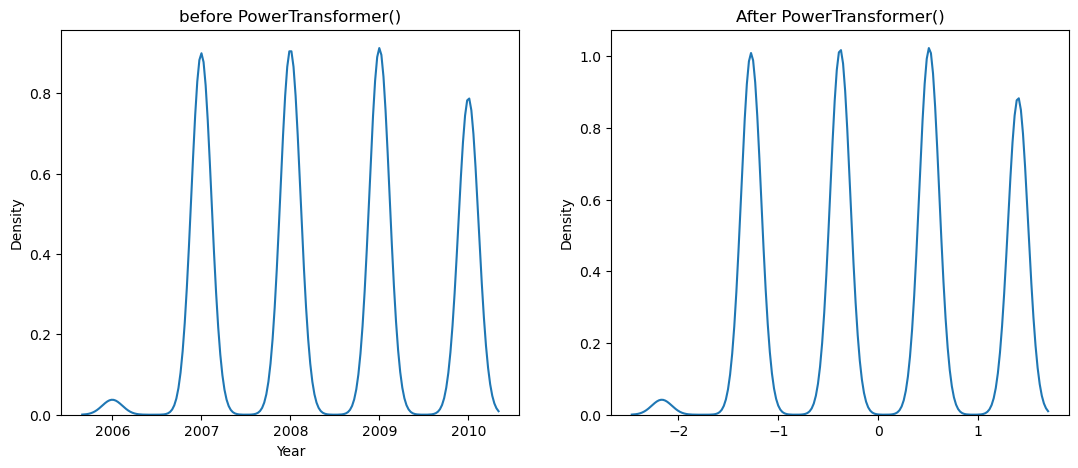

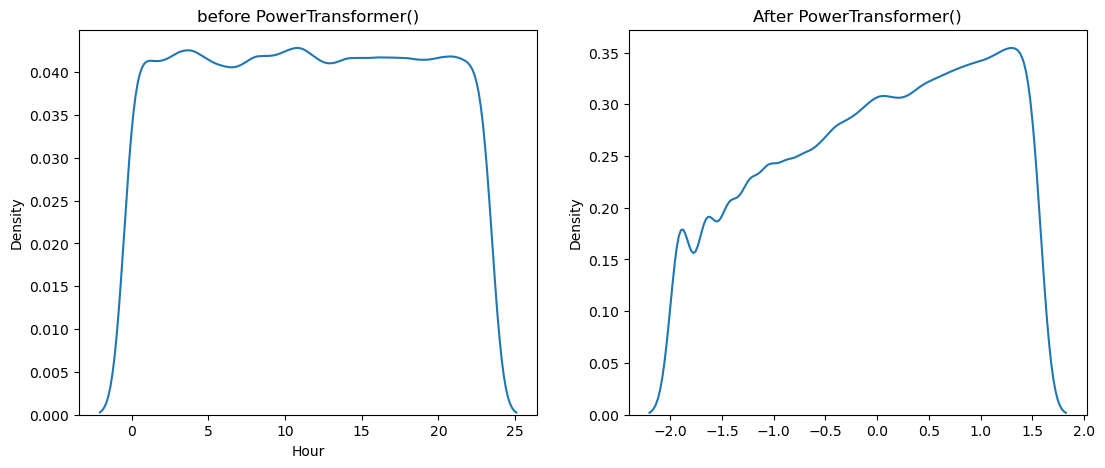

In [39]:
from sklearn.preprocessing import PowerTransformer
X2=X1.copy()
def power_plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t))
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After ' + str(t))
for col in X2.columns:
    power_plots(X2,col,PowerTransformer())

In [40]:
X = X2.copy()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
def train_model(model):
    m = model[1]
    y_train_pred = cross_val_predict(model[1], X_train, y_train, cv=5)
    mae = mean_absolute_error(y_train,y_train_pred)
    mse = mean_squared_error(y_train,y_train_pred)
    rmse = np.sqrt(mse)
    rmsle = np.log(rmse)
    r2 = r2_score(y_train,y_train_pred)
    
    print(f'{model[0]} MAE: {mae}')
    print(f'{model[0]} MSE: {mse}')
    print(f'{model[0]} RMSE: {rmse}')
    print(f'{model[0]} RMSLE: {rmsle}')
    print(f'{model[0]} R2 score: {r2}')

In [125]:
from sklearn.linear_model import LinearRegression
train_model(('Linear Regression', LinearRegression()))

Linear Regression MAE: 4.497782674841144
Linear Regression MSE: 55.08760926943549
Linear Regression RMSE: 7.422102752551698
Linear Regression RMSLE: 2.0044624068637407
Linear Regression R2 score: 0.6682174823349702


In [126]:
from sklearn.linear_model import Ridge
train_model(('Ridge Regression', Ridge()))

Ridge Regression MAE: 4.496691323024593
Ridge Regression MSE: 55.08801691482221
Ridge Regression RMSE: 7.422130214084243
Ridge Regression RMSLE: 2.0044661068235308
Ridge Regression R2 score: 0.6682150271619375


In [127]:
from sklearn.neural_network import MLPRegressor
train_model(('MLPR Regression', MLPRegressor(random_state=1, max_iter=500)))

MLPR Regression MAE: 3.026059383393284
MLPR Regression MSE: 34.2027280491859
MLPR Regression RMSE: 5.848309845518267
MLPR Regression RMSLE: 1.7661527042036778
MLPR Regression R2 score: 0.7940032727202155


In [128]:
from sklearn.linear_model import Lasso
train_model(('Lasso Regression', Lasso()))

Lasso Regression MAE: 4.587306312713201
Lasso Regression MSE: 58.79680194570567
Lasso Regression RMSE: 7.667907272894324
Lasso Regression RMSLE: 2.037043732373494
Lasso Regression R2 score: 0.6458776984714434


In [129]:
from sklearn.linear_model import ElasticNet
train_model(('Lasso Regression', ElasticNet()))

Lasso Regression MAE: 5.074833606660573
Lasso Regression MSE: 64.14109847944121
Lasso Regression RMSE: 8.008813799773423
Lasso Regression RMSLE: 2.0805426601979464
Lasso Regression R2 score: 0.6136899854334941


In [130]:
from sklearn.tree import DecisionTreeRegressor
train_model(('Decision Tree Regression', DecisionTreeRegressor()))

Decision Tree Regression MAE: 2.9125017223240532
Decision Tree Regression MSE: 54.11338006484897
Decision Tree Regression RMSE: 7.356179719450101
Decision Tree Regression RMSLE: 1.9955407381252601
Decision Tree Regression R2 score: 0.6740850852781217


In [56]:
from sklearn.ensemble import RandomForestRegressor
train_model(('Random Forest Regression', RandomForestRegressor()))

Random Forest Regression MAE: 2.461972141863336
Random Forest Regression MSE: 29.21537808079441
Random Forest Regression RMSE: 5.405125167911878
Random Forest Regression RMSLE: 1.6873476086235664
Random Forest Regression R2 score: 0.8232341586943162


In [132]:
from sklearn.neighbors import KNeighborsRegressor
train_model(('KNN Regression', KNeighborsRegressor()))

KNN Regression MAE: 2.869749993933426
KNN Regression MSE: 39.28521247267821
KNN Regression RMSE: 6.2677916743202475
KNN Regression RMSLE: 1.8354240875534704
KNN Regression R2 score: 0.763392405768776


In [134]:
from sklearn.svm import SVR
train_model(('SVM Regression', SVR()))

SVM Regression MAE: 3.1928529283756677
SVM Regression MSE: 42.22676782894319
SVM Regression RMSE: 6.498212664182605
SVM Regression RMSLE: 1.8715271643479676
SVM Regression R2 score: 0.7456759600036457


In [46]:
from xgboost import XGBRegressor
train_model(('xhboost Regression', XGBRegressor()))

xhboost Regression MAE: 2.666513129328924
xhboost Regression MSE: 30.663627491682792
xhboost Regression RMSE: 5.537474829891581
xhboost Regression RMSLE: 1.7115385899688842
xhboost Regression R2 score: 0.8144716150493843


## Hyperparameter tuning

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': [4, 6, 8],'n_estimators': [5, 10]}


forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='r2',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_features': [4, 6, 8], 'n_estimators': [5, 10]},
             return_train_score=True, scoring='r2')

In [58]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 10}

In [59]:
rf_reg = grid_search.best_estimator_

In [61]:
y_pred = rf_reg.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmsle = np.log(rmse)
r2 = r2_score(y_test,y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'RMSLE: {rmsle}')
print(f'R2 score: {r2}')


MAE: 2.4763317910745593
MSE: 29.8432009854097
RMSE: 5.462893096648488
RMSLE: 1.697978520605691
R2 score: 0.8227113721204004


## Saving the Best Model

In [62]:
import pickle
with open('../artifacts/model.pkl', 'wb') as files:
    pickle.dump(rf_reg, files)